In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [3]:
Base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results_6 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)
results_6[:10]
    

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0)]

In [7]:
#  3. Convert the June temperatures to a list.
list(results_6)[:10]

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0)]

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_6 = pd.DataFrame(results_6, columns=['date', 'temperatures'])
df_6.head()

,date,temperatures
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_6.describe()

,temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:ylabel='Frequency'>

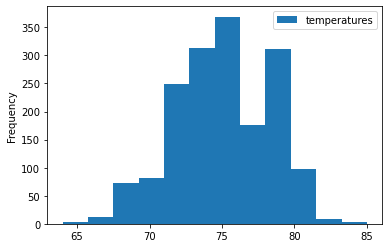

In [10]:
df_6.plot.hist(bins=12)


## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_12 = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
results_12[:10]

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0)]

In [12]:
# 7. Convert the December temperatures to a list.
list(results_12)
results_12[:10]

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0)]

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_12 = pd.DataFrame(results_12, columns=['date', 'temperatures'])
df_12.head()

,date,temperatures
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_12.describe()

,temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:ylabel='Frequency'>

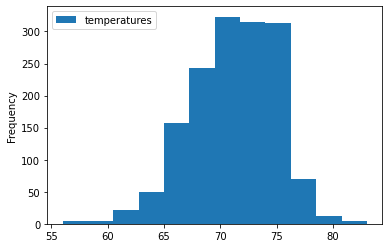

In [15]:
df_12.plot.hist(bins=12)


In [16]:
# amount of rain in June 
results_prcp_6 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==6).all()
results_prcp_6[:10]

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0)]

In [17]:
df_prcp_6 = pd.DataFrame(results_prcp_6, columns=['date', 'precipitation'])
df_prcp_6.head()

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00


In [18]:
df_prcp_6.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [19]:
# amount of rain in December 
results_prcp_12 = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date)==12).all()
results_prcp_12[:10]

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0)]

In [20]:
df_prcp_12 = pd.DataFrame(results_prcp_12, columns=['date', 'precipitation'])
df_prcp_12.head()

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00


In [21]:
df_prcp_12.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [22]:
res_6 = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date)==6)\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
res_6


[('USC00519397', 236),
 ('USC00519281', 236),
 ('USC00513117', 236),
 ('USC00519523', 232),
 ('USC00516128', 223),
 ('USC00514830', 186),
 ('USC00511918', 165),
 ('USC00517948', 148),
 ('USC00518838', 38)]

In [23]:
res_12 = session.query(Measurement.station, func.count(Measurement.station)).filter(extract('month', Measurement.date)==12)\
.group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
res_12


[('USC00519281', 217),
 ('USC00513117', 216),
 ('USC00519523', 210),
 ('USC00519397', 210),
 ('USC00516128', 206),
 ('USC00514830', 178),
 ('USC00511918', 152),
 ('USC00517948', 109),
 ('USC00518838', 19)]